# Predicting whether a given tweet is about a real disaster or not using machine learning




## 1. Problem Definition 

In a statement, 
> You are predicting whether a given tweet is about a real disaster or not. If so, predict a 1. If not, predict a 0? 

## 2. Data 

There is available on Kaggle https://www.kaggle.com/competitions/nlp-getting-started/data

## 4. Features 

**Create data dictionary**

1. id - a unique identifier for each tweet
2. text - the text of the tweet
3. location - the location the tweet was sent from (may be blank) 
4. keyword - a particular keyword from the tweet (may be blank)
5. target - in train.csv only, this denotes whether a tweet is about a real disaster (1) or not (0)

## Preparing the tools

We're going to use pandas, Matplotlib and NumPy for data analysis and manipulation 

In [1]:
# Import all the tools we need

import nltk
import re
import string 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# we want our plots to appear inside the notebook
%matplotlib inline   

# Model from scikit-Learn 
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import classification_report,f1_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from nltk.corpus import stopwords 
from nltk.stem import PorterStemmer 

In [2]:
#nltk.download_shell()

In [3]:
df = pd.read_csv('train.csv')
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


## Exploratory Data Analysis



In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [5]:
df.describe() 

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


In [6]:
df.groupby('text').describe()

id               \
                                                   count     mean std   
text                                                                    
! Residents Return To Destroyed Homes As Washin...   1.0  10517.0 NaN   
# handbags Genuine Mulberry Antony Cross Body M...   1.0   1383.0 NaN   
#360WiseNews : China's Stock Market Crash: Are ...   1.0   8314.0 NaN   
#360WiseNews : China's Stock Market Crash: Are ...   1.0   8334.0 NaN   
#360WiseNews : China's Stock Market Crash: Are ...   1.0   8301.0 NaN   
...                                                  ...      ...  ..   
Û÷We Can HelpÛª Says Denver Firefighter Worki...   1.0   5420.0 NaN   
å_? New Ladies Shoulder Tote #Handbag Faux Leat...   1.0   1414.0 NaN   
å¤} New Ladies Shoulder Tote #Handbag Faux Leat...   1.0   1394.0 NaN   
å¬'Only the sea knows how many are dead' @MSF_S...   1.0   4006.0 NaN   
åÈMGN-AFRICAå¨ pin:263789F4 åÈ Correction: Tent...   1.0   2351.0 NaN   

                                                                               \
                                                        min      25%      50%   
text                                                                            
! Residents Return To Destroyed Homes As Washin...  10517.0  10517.0  10517.0   
# handbags Genuine Mulberry Antony Cross Body M...   1383.0   1383.0   1383.0   
#360WiseNews : China's Stock Market Crash: Are ...   8314.0   8314.0   8314.0   
#360WiseNews : China's Stock Market Crash: Are ...   8334.0   8334.0   8334.0   
#360WiseNews : China's Stock Market Crash: Are ...   8301.0   8301.0   8301.0   
...                                                     ...      ...      ...   
Û÷We Can HelpÛª Says Denver Firefighter Worki...   5420.0   5420.0   5420.0   
å_? New Ladies Shoulder Tote #Handbag Faux Leat...   1414.0   1414.0   1414.0   
å¤} New Ladies Shoulder Tote #Handbag Faux Leat...   1394.0   1394.0   1394.0   
å¬'Only the sea knows how many are dead' @MSF_S...   4006.0   4006.0   4006.0   
åÈMGN-AFRICAå¨ pin:263789F4 åÈ Correction: Tent...   2351.0   2351.0   2351.0   

                                                                     target  \
                                                        75%      max  count   
text                                                                          
! Residents Return To Destroyed Homes As Washin...  10517.0  10517.0    1.0   
# handbags Genuine Mulberry Antony Cross Body M...   1383.0   1383.0    1.0   
#360WiseNews : China's Stock Market Crash: Are ...   8314.0   8314.0    1.0   
#360WiseNews : China's Stock Market Crash: Are ...   8334.0   8334.0    1.0   
#360WiseNews : China's Stock Market Crash: Are ...   8301.0   8301.0    1.0   
...                                                     ...      ...    ...   
Û÷We Can HelpÛª Says Denver Firefighter Worki...   5420.0   5420.0    1.0   
å_? New Ladies Shoulder Tote #Handbag Faux Leat...   1414.0   1414.0    1.0   
å¤} New Ladies Shoulder Tote #Handbag Faux Leat...   1394.0   1394.0    1.0   
å¬'Only the sea knows how many are dead' @MSF_S...   4006.0   4006.0    1.0   
åÈMGN-AFRICAå¨ pin:263789F4 åÈ Correction: Tent...   2351.0   2351.0    1.0   

                                                                            \
                                                   mean std  min  25%  50%   
text                                                                         
! Residents Return To Destroyed Homes As Washin...  1.0 NaN  1.0  1.0  1.0   
# handbags Genuine Mulberry Antony Cross Body M...  0.0 NaN  0.0  0.0  0.0   
#360WiseNews : China's Stock Market Crash: Are ...  1.0 NaN  1.0  1.0  1.0   
#360WiseNews : China's Stock Market Crash: Are ...  1.0 NaN  1.0  1.0  1.0   
#360WiseNews : China's Stock Market Crash: Are ...  0.0 NaN  0.0  0.0  0.0   
...                                                 ...  ..  ...  ...  ...   
Û÷We Can HelpÛª Says Denver Firefighter Worki...  1.0 NaN  1.0  1.0  1.0   
å_? New L

In [7]:
df['text length'] = df['text'].apply(len)  

In [8]:
sns.set_style('whitegrid') 

In [9]:
df['text length'].describe()

count    7613.000000
mean      101.037436
std        33.781325
min         7.000000
25%        78.000000
50%       107.000000
75%       133.000000
max       157.000000
Name: text length, dtype: float64

In [10]:
df['target'].value_counts() 

0    4342
1    3271
Name: target, dtype: int64

In [11]:
# missing data
df.isnull().sum().mean() 

432.3333333333333

In [12]:
# disaster tweet 
df[df['target']==1]['text'][0]

'Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all'

In [13]:
# non disaster tweet 
df[df['target']==0]['text'][:1]

15    What's up man?
Name: text, dtype: object

In [14]:
for mess_no,message in enumerate(df['text'][:10]):
    print(mess_no,message)
    print('\n') # new line 

0 Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all


1 Forest fire near La Ronge Sask. Canada


2 All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected


3 13,000 people receive #wildfires evacuation orders in California 


4 Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school 


5 #RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires


6 #flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas


7 I'm on top of the hill and I can see a fire in the woods...


8 There's an emergency evacuation happening now in the building across the street


9 I'm afraid that the tornado is coming to our area...




In [15]:
df['keyword'].value_counts()

fatalities               45
armageddon               42
deluge                   42
harm                     41
body%20bags              41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 221, dtype: int64

In [16]:
df['location'].value_counts()

USA                         104
New York                     71
United States                50
London                       45
Canada                       29
                           ... 
???????, ??'??????            1
someplace living my life      1
Caracas, Venezuela.           1
maryland                      1
lakewood colorado             1
Name: location, Length: 3341, dtype: int64

### Data Visualization


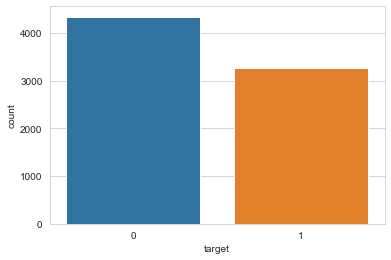

In [17]:
sns.countplot(x='target',data=df);

In [18]:
#g = sns.FacetGrid(df, col="target");
#g.map(plt.hist, 'text length');

<AxesSubplot:ylabel='Frequency'>

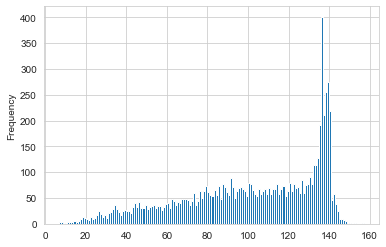

In [19]:
df['text length'].plot.hist(bins=150)

In [20]:
df[df['text length']==157]['text'].iloc[0]

"when you're taking a shower and someone flushes the toilet and you have .1 second to GTFO or you get burned??????????????????????????????????????????????????"

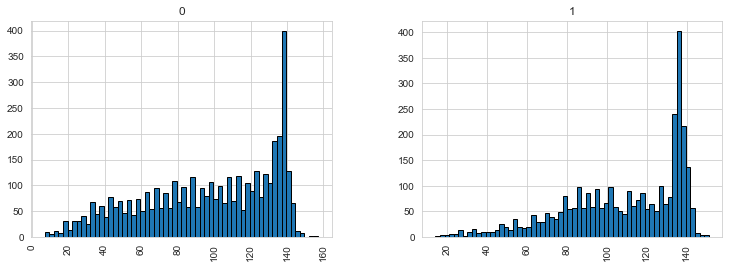

In [21]:
df.hist(column='text length',by='target',bins=60,figsize=(12,4),ec='black');

In [22]:
#stopwords.words('english')

### Text Pre-processing

In [23]:
porter = PorterStemmer()
def text_process(mess):
    
    """
    1. remove punc 
    2. remove stop words 
    3.remove text in square brackets
    4.remove links
    5.remove words containing numbers
    6. return list of clean text words 
    """
    mess = str(mess).lower()
    mess = re.sub('\[.*?\]', '', mess)
    mess = re.sub('https?://\S+|www\.\S+', '', mess)
    mess = re.sub('<.*?>+', '', mess)
    mess = re.sub('[%s]' % re.escape(string.punctuation), '', mess)
    mess = re.sub('\n', '', mess)
    mess = re.sub('\w*\d\w*', '', mess)
    
    words = [word for word in mess.split() if word.lower() not in stopwords.words('english')]
    ls=[]
    
    for x in words:
        ls.append(porter.stem(x))
    return ls

        

In [24]:
 df['text'].head(5).apply(text_process)

0    [deed, reason, earthquak, may, allah, forgiv, us]
1         [forest, fire, near, la, rong, sask, canada]
2    [resid, ask, shelter, place, notifi, offic, ev...
3    [peopl, receiv, wildfir, evacu, order, califor...
4    [got, sent, photo, rubi, alaska, smoke, wildfi...
Name: text, dtype: object

### Vectorization

In [25]:
X = df['text']
y = df['target']

In [26]:
bow_transformer = CountVectorizer(analyzer=text_process, ngram_range=(1,2)).fit(X)

C:\Users\hi\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:532: UserWarning: The parameter 'ngram_range' will not be used since 'analyzer' is callable'
  warnings.warn(


In [27]:
print(len(bow_transformer.vocabulary_))

13714


In [28]:
messages_bow = bow_transformer.transform(X)

In [29]:
pd.DataFrame(messages_bow.toarray(), columns=bow_transformer.get_feature_names())

C:\Users\hi\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aa,aaaa,aaaaaaallll,aaarrrgghhh,aaceorg,aampb,aampw,aan,aannnnd,aar,...,å¨,å¬onli,åç,åè,åèmgnafricaå¨,åê,åêfedex,åêi,ì¢,ìü
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7608,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7609,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7610,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7611,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
print('Shape of Sparse Matrix:', messages_bow.shape)

Shape of Sparse Matrix: (7613, 13714)


In [31]:
messages_bow.nnz #  none zero occurrences  

65998

In [32]:
tfidf_transformer = TfidfTransformer().fit(messages_bow) 

In [33]:
messages_tfidf = tfidf_transformer.transform(messages_bow)

In [34]:
messages_tfidf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### Training a model

In [35]:
# separate dataset into train and test
np.random.seed(42)# for reproducibility
X_train,X_test,y_train,y_test = train_test_split(messages_tfidf.toarray(),y,test_size=0.3)

In [36]:
X_train.shape,X_test.shape

((5329, 13714), (2284, 13714))

In [37]:
disaster_detect_model = MultinomialNB().fit(X_train,y_train)

### Model Evaluation

In [38]:
prediction = disaster_detect_model.predict(X_test)

In [39]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.79      0.91      0.84      1318
           1       0.84      0.66      0.74       966

    accuracy                           0.81      2284
   macro avg       0.82      0.79      0.79      2284
weighted avg       0.81      0.81      0.80      2284



In [40]:
print(f1_score(y_test,prediction))

0.7427578215527231


### Putting it all Together

In [41]:
# separate dataset into train and test
np.random.seed(42)# for reproducibility
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [42]:
pipeline = Pipeline([('bow',CountVectorizer(analyzer=text_process)),
                     ('tfidf',TfidfTransformer()),
                     ('classifier',MultinomialNB())])

In [43]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x0000024B430740D0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [44]:
predictions = pipeline.predict(X_test)

In [45]:
from sklearn.metrics import classification_report

In [46]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84      1318
           1       0.84      0.67      0.74       966

    accuracy                           0.81      2284
   macro avg       0.81      0.79      0.79      2284
weighted avg       0.81      0.81      0.80      2284



In [47]:
print(f1_score(y_test,predictions))

0.7443997702469844


## Make predictions on test data 

In [48]:
# import test data 
dt_test = pd.read_csv('test.csv')
dt_test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


### Preprocessing test data 

In [49]:
dt_test['text'].head(5).apply(text_process)

0                        [happen, terribl, car, crash]
1    [heard, earthquak, differ, citi, stay, safe, e...
2    [forest, fire, spot, pond, gees, flee, across,...
3                  [apocalyps, light, spokan, wildfir]
4             [typhoon, soudelor, kill, china, taiwan]
Name: text, dtype: object

In [50]:
# 4. transform testing data into a document-term matrix (using existing vocabulary)
test_dt = bow_transformer.transform(dt_test['text'])
test_dt.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [52]:
y_pred=pipeline.predict(dt_test['text'])

In [53]:
Id = dt_test['id']
df_preds = pd.DataFrame(y_pred,columns=['target'],index=[Id])

In [54]:
df_preds.to_csv('nlpStem00.csv')